## Tanques alemanes

¡Bienvenido/da! En esta oportunidad trabajaremos sobre uno de los clásicos de la estadística: el problema de los tanques alemanes. 


### Introducción

El problema se da en 1941 durante la segunda guerra mundial. Los Aliados necesitaban calcular cuantos tanques tenían los alemanes para lo cual se desarrollaban complejos calculos con ese fin.

Los calculos se basaban en 2 variables: la cantidad de tanques capturados y el máximo número de serie observado en esos tanques.

Cuando terminó la guerra, salió a la luz el registro de los tanques fabricados mensualmente. En particular, se sabe que en junio de 1941 se fabricaron 271 tanques alemanes.

Suponga que se quiere testear si había infiltrados alemanes entre los militares aliados que participaron de las batallas que tuvieron lugar durante julio de 1941 (asuma que en julio sólo se usaron los tanques fabricados en junio).


### Problema 1

1. Asumiendo que se capturan k=10 tanques y se fabricaron 271. ¿Cuál es el promedio del máximo esperado y su intervalo de confianza? Explicita qué intervalo utilizas (Desviación Estándar, 5-95 percentil, etc.). ¿Aclararías algo sobre este intervalo de confianza?

1. Si en una batalla se capturaron k=10 tanques alemanes y un militar aliado informó que el mayor número de serie observado fue m=80. Diseñe un test simulado para la hipótesis de que se trataba de un infiltrado, es decir, que informó un número de serie menor al real para hacerle pensar a los aliados que los alemanes tenían menos tanques. Calcule el valor de p y saca tus conculciones.


**Ayuda**: pueden resultarte de utilidad algunas lineas de código vistas en la ejercitación anterior.


In [1]:
#Ho: el número que informó el soldado no es menor al real.
#Ha: el número que informó el soldado es menor al real.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb

In [125]:
#1
tanques_existentes = np.arange(1, 272)

m_observado = 80
k = 10 # numero de muestras
#N = 1000000 # cantidad de veces que tomaremos una muestra
N = int(2e6)

In [126]:
#tanques_existentes += 1000

In [127]:
tanques_existentes

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [128]:
maximos = np.zeros(N)
 #generamos muestras de 10 y calculamos el promedio de los maximos de esas muestras
for i in range(N):
    muestra = np.random.choice(tanques_existentes, k, replace=False)
    maximos[i] = np.amax(muestra)

In [129]:
elegidos = np.random.choice(tanques_existentes, k, replace=False)

In [130]:
elegidos

array([ 13, 137, 226,  39,  96,  66, 122, 270,  88, 207])

In [131]:
elegidos.sort()
elegidos

array([ 13,  39,  66,  88,  96, 122, 137, 207, 226, 270])

In [132]:
maximos

array([231., 234., 238., ..., 271., 246., 204.])

In [133]:
np.amin(maximos)

68.0

In [134]:
np.amax(maximos)

271.0

In [135]:
m_promedio = np.mean(maximos)

In [136]:
m_promedio

247.2849285

In [137]:
desv = np.std(maximos)

In [138]:
desv

22.113063972455013

In [139]:
[m_promedio - desv, m_promedio + desv]

[225.17186452754498, 269.39799247245503]

In [140]:
ic_min, ic_max = np.percentile(maximos, [5,95])

print(ic_min, m_promedio, ic_max)

203.0 247.2849285 270.0


In [141]:
maximos[maximos > 250].size

1120353

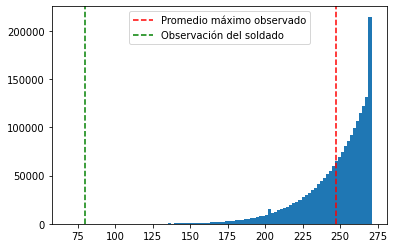

In [142]:
#2
plt.hist(maximos, bins = 100)
plt.axvline(m_promedio, c = 'r', ls = '--', label = 'Promedio máximo observado')
plt.axvline(m_observado, c = 'g', ls = '--', label = 'Observación del soldado')
plt.legend()
plt.show()

In [143]:
eventos_menos_extremos = maximos[maximos <= m_observado]
print(f'Hay {eventos_menos_extremos.size} valores máximos iguales o menores al observado')

Hay 5 valores máximos iguales o menores al observado


In [144]:
maximos.size

2000000

In [145]:
maximos[maximos <= m_observado].size

5

In [146]:
p_valor = eventos_menos_extremos.size/N
print(f'El p-valor es {p_valor}')

El p-valor es 2.5e-06


In [13]:
maximos

array([254., 261., 262., ..., 269., 199., 263.])

2. La hipótesis asumida es que los tanques observados en el frente de batalla en el cual participó el militar son representativos de la muestra 1-271 y tienen una distribución uniforme . ¿Si hubiese dos frentes, y se hubieran repartido mitad y mitad? Entonces, los tanques que participan en la batalla en cuestión son los que están numerados del 1 al 136. ¿Cómo modifica esto el escenario?

In [147]:
#hay que modificar el tamaño de la muestras, hagamos remuestreo

In [148]:
tanques_existentes = np.arange(1, 136)

In [149]:
#k,N son los mismos de antes

maximos_nuevo = np.zeros(N)
 #generamos muestras de 10 y calculamos el promedio de los maximos de esas muestras
for i in range(N):
    muestra = np.random.choice(tanques_existentes, k, replace=False)
    maximos_nuevo[i] = np.amax(muestra)

In [150]:
np.mean(maximos_nuevo)

123.6292545

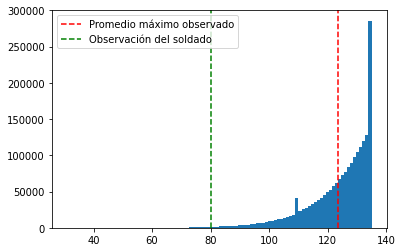

In [151]:
plt.hist(maximos_nuevo, bins = 100)
plt.axvline(np.mean(maximos_nuevo), c = 'r', ls = '--', label = 'Promedio máximo observado')
plt.axvline(m_observado, c = 'g', ls = '--', label = 'Observación del soldado')
plt.legend()
plt.show()

In [152]:
eventos_menos_extremos = maximos_nuevo[maximos_nuevo <= m_observado]
print(f'Hay {eventos_menos_extremos.size} valores máximos iguales o menores al observado')

Hay 8302 valores máximos iguales o menores al observado


In [153]:
p_valor = eventos_menos_extremos.size/N
print(f'El p-valor es {p_valor}')

El p-valor es 0.004151


## Problema 2

Avanzado el juicio, se supieron otros informes de soldados que participaron en la misma batalla. Diseñe un nuevo test que, dada esta nueva información, calcule la probabildiad de que el soldado haya dicho la verdad.

**Comentario**: no hay una única forma de diseñar el test. Intenta usar algún estadístico como promedio, máximo, varianza o mínimo -o una conjunción de varios-.

**Valores informados**:

Soldado_1 = [2, 40, 5, 89, 93]

Soldado_2 = [98, 3, 64, 40, 23]

Soldado_3 = [6, 9, 24, 62, 54]

Soldado_4 = [14, 52, 4, 505, 3]

Soldado_5 = [23, 59, 30, 12, 24]

In [22]:
import scipy as sc#libreria para hacer combinatorias

In [23]:
#generamos test que devuelva la probabilidad teórica P de que el soldado haya dicho la verdad en función de lo que reportó

def calcula_proba(s): #s son las observaciones del soldado
    n=271
    k=len(s) #tanques observados
    m=max(s)

    P= (k-1)/k*sc.special.comb(m-1,k-1)/sc.special.comb(m,k) #tenemos todos los datos, no es necesario usar Bayes

    return P

In [207]:
def estimar_maximo(listado):
    array = np.array(listado)
    array.sort()
    return np.amax(array) + np.mean((array - np.roll(array,1))[1:])

In [208]:
Soldado_1 = [2, 40, 5, 89, 93]

Soldado_2 = [98, 3, 64, 40, 23]

Soldado_3 = [6, 9, 24, 62, 54]

Soldado_4 = [14, 52, 4, 505, 3]

Soldado_5 = [23, 59, 30, 12, 24]

In [213]:
estimar_maximo(Soldado_5)

70.75

In [ ]:
np.linspace()
np.logspace()

In [190]:
s1 = np.array(Soldado_1)
s1.sort()

In [191]:
s1

array([ 2,  5, 40, 89, 93])

In [192]:
distancias = s1 - np.roll(s1,1)

In [199]:
(s1 - np.roll(s1,1))[1:]

array([ 3, 35, 49,  4])

In [196]:
np.roll(s1,1)

array([93,  2,  5, 40, 89])

In [200]:
np.mean((s1 - np.roll(s1,1))[1:])

22.75

In [157]:
print(f"{calcula_proba(Soldado_1)=}")
print(f"{calcula_proba(Soldado_2)=}")
print(f"{calcula_proba(Soldado_3)=}")
print(f"{calcula_proba(Soldado_4)=}")
print(f"{calcula_proba(Soldado_5)=}")

calcula_proba(Soldado_1)=0.043010752688172046
calcula_proba(Soldado_2)=0.04081632653061224
calcula_proba(Soldado_3)=0.06451612903225806
calcula_proba(Soldado_4)=0.007920792079207921
calcula_proba(Soldado_5)=0.06779661016949153


In [158]:
print('holas')

holas


In [159]:
variable = 10

In [160]:
print(variable)

10


In [171]:
texto = f"hola! esta es la variable: {variable=}"

In [170]:
texto

'hola! esta es la variable: 10'

In [172]:
texto

'hola! esta es la variable: variable=10'

In [166]:
"hola! esta es la variable: %s %s %s poniendo más texto"%(variable, 'repe', 'orden')

'hola! esta es la variable: 10 repe orden poniendo más texto'

In [214]:
spotify = pd.read_csv("top50.csv")

In [215]:
spotify

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
